### Visualization & EDA of the Merged/Concatenated ACS DataFrames (2013-2017)

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
from datetime import datetime
import time 
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 1000)
import scipy.stats
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("./data/total_df.csv")

In [4]:
df.head()

,zip_code,Monthly_Avg_Zip,FL_Unemployment,year,Encoded_Zip,total_pop,households,male_pop,female_pop,median_age,male_under_5,male_5_to_9,male_10_to_14,male_15_to_17,male_18_to_19,male_20,male_21,male_22_to_24,male_25_to_29,male_30_to_34,male_35_to_39,male_40_to_44,male_45_to_49,male_50_to_54,male_55_to_59,male_65_to_66,male_67_to_69,male_70_to_74,male_75_to_79,male_80_to_84,male_85_and_over,female_under_5,female_5_to_9,female_10_to_14,female_15_to_17,female_18_to_19,female_20,female_21,female_22_to_24,female_25_to_29,female_30_to_34,female_35_to_39,female_40_to_44,female_45_to_49,female_50_to_54,female_55_to_59,female_60_to_61,female_62_to_64,female_65_to_66,female_67_to_69,female_70_to_74,female_75_to_79,female_80_to_84,female_85_and_over,population_1_year_and_over,population_3_years_over,pop_16_over,pop_25_years_over,pop_25_64,not_us_citizen_pop,other_race_pop,two_or_more_races_pop,median_income,income_per_capita,income_less_10000,income_10000_14999,income_15000_19999,income_20000_24999,income_25000_29999,income_30000_34999,income_35000_39999,income_40000_44999,income_45000_49999,income_50000_59999,income_60000_74999,income_75000_99999,income_100000_124999,income_125000_149999,income_150000_199999,income_200000_or_more,pop_determined_poverty_status,poverty,gini_index,housing_units,renter_occupied_housing_units_paying_cash_median_gross_rent,owner_occupied_housing_units_lower_value_quartile,owner_occupied_housing_units_median_value,owner_occupied_housing_units_upper_value_quartile,occupied_housing_units,housing_units_renter_occupied,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,dwellings_1_units_detached,dwellings_1_units_attached,dwellings_2_units,dwellings_3_to_4_units,dwellings_5_to_9_units,dwellings_10_to_19_units,dwellings_20_to_49_units,dwellings_50_or_more_units,mobile_homes,housing_built_2005_or_later,housing_built_2000_to_2004,housing_built_1939_or_earlier,median_year_structure_built,married_households,nonfamily_households,family_households,households_public_asst_or_food_stamps,male_male_households,female_female_households,children,children_in_single_female_hh,median_rent,percent_income_spent_on_rent,rent_burden_not_computed,rent_over_50_percent,rent_40_to_50_percent,rent_35_to_40_percent,rent_30_to_35_percent,rent_25_to_30_percent,rent_20_to_25_percent,rent_15_to_20_percent,rent_10_to_15_percent,rent_under_10_percent,owner_occupied_housing_units,million_dollar_housing_units,mortgaged_housing_units,different_house_year_ago_different_city,different_house_year_ago_same_city,families_with_young_children,two_parent_families_with_young_children,two_parents_in_labor_force_families_with_young_children,two_parents_father_in_labor_force_families_with_young_children,two_parents_mother_in_labor_force_families_with_young_children,two_parents_not_in_labor_force_families_with_young_children,one_parent_families_with_young_children,father_one_parent_families_with_young_children,father_in_labor_force_one_parent_families_with_young_children,commute_less_10_mins,commute_10_14_mins,commute_15_19_mins,commute_20_24_mins,commute_25_29_mins,commute_30_34_mins,commute_35_44_mins,commute_60_more_mins,commute_45_59_mins,commuters_16_over,walked_to_work,worked_at_home,no_car,no_cars,one_car,two_cars,three_cars,four_more_cars,aggregate_travel_time_to_work,commuters_by_public_transportation,commuters_by_bus,commuters_by_car_truck_van,commuters_by_carpool,commuters_by_subway_or_elevated,commuters_drove_alone,group_quarters,associates_degree,bachelors_degree,high_school_diploma,less_one_year_college,masters_degree,one_year_more_college,less_than_high_school_graduate,high_school_including_ged,bachelors_degree_2,bachelors_degree_or_higher_25_64,graduate_professional_degree,some_college_and_associates_degree,male_45_64_associates_degree,male_45_64_bachelors_degree,male_45_64_graduate_degree,male_45_64_less_than_9_grade,male_45_64_grade_9_12,male_45_64_high_school,male_45_64_some_college,male_45_to_64,employed_pop,unem

In [5]:
df.year.unique()

array([2013, 2014, 2015, 2016, 2017, 2018])

Remove columns that are 

In [6]:
df=df.drop([
    'renter_occupied_housing_units_paying_cash_median_gross_rent', 
    'median_rent', 
    'percent_income_spent_on_rent', 
    'rent_burden_not_computed', 
    'rent_over_50_percent',
    'rent_40_to_50_percent',
    'rent_35_to_40_percent',
    'rent_30_to_35_percent',
    'rent_25_to_30_percent',
    'rent_20_to_25_percent',
    'rent_15_to_20_percent',
    'rent_10_to_15_percent',
    'rent_under_10_percent'], axis=1
)
dup_cols=['occupied_housing_units',
 'management_business_sci_arts_employed',
 'sales_office_employed']
df=df.drop(dup_cols, axis=1)

### Since we're going to predict 2018, the EDA and visualization will focus on the data from 2013 to 2017 (train set)

In [8]:
df=df[df["year"].isin([2013,2014,2015,2016,2017])]

In [9]:
df=df.drop(["zip_code","year"],axis=1)
#dropping unique identifiers

# EDA/Visualization

In [49]:
def feature_plot(df,col):
    sns.set_style('darkgrid')
    plt.figure(figsize = (32, 12))
    
    plt.subplot(1, 2, 1)
    
    order = df.groupby(by=[col])['Monthly_Avg_Zip'].mean().sort_values().index
    
    if df[col].dtype == 'int64' or df[col].dtype == 'float64':
        sns.distplot(df[col])
        plt.ylabel("Density", fontsize=30)
        plt.title("Density Plot of \n"+str(col),fontsize=43)
        plt.xticks(fontsize=30)
        
    else: #categorical variable 
        sns.countplot(x=col, data=df, order=order)
        plt.ylabel("Count", fontsize=30)
        
    plt.xlabel(col,fontsize=30)
    plt.xticks(rotation=90,fontsize=30)
    plt.yticks(fontsize=30)
    
    
    plt.subplot(1, 2, 2)
    
    if df[col].dtype == 'int64' or df[col].dtype == 'float64':
        sns.regplot(x=col, y="Monthly_Avg_Zip", data=df, scatter_kws={'alpha':0.3})
        plt.title("Monthly Average Zillow Rent Index vs \n "+str(col),fontsize=43)
    else:#categorical variable 
        sns.boxplot(x=col, y="Monthly_Avg_Zip", data=df, order=order)
        
    plt.xlabel(col, fontsize=30)
    plt.ylabel("Monthly Average Zillow Rent Index", fontsize=30)
    plt.xticks(rotation=90,fontsize=30)
    plt.yticks(fontsize=30)
    plt.subplots_adjust(wspace=0.5)
    plt.show()

### How does each numerical feature correlate to the Monthly Average Zillow Rent Index?

In [19]:
top_corr_features=df.corrwith(df["Monthly_Avg_Zip"]).sort_values(ascending=False)
top_corr_features

Monthly_Avg_Zip                                                   1.000000
owner_occupied_housing_units_median_value                         0.649146
owner_occupied_housing_units_upper_value_quartile                 0.648629
owner_occupied_housing_units_lower_value_quartile                 0.632611
dwellings_50_or_more_units                                        0.498508
million_dollar_housing_units                                      0.483262
income_200000_or_more                                             0.470178
graduate_professional_degree                                      0.426398
not_us_citizen_pop                                                0.413054
commuters_by_subway_or_elevated                                   0.401298
income_per_capita                                                 0.395348
gini_index                                                        0.384800
male_45_64_graduate_degree                                        0.384604
masters_degree           

# Top Features which correlate to the Monthly Average Zillow Rent Index

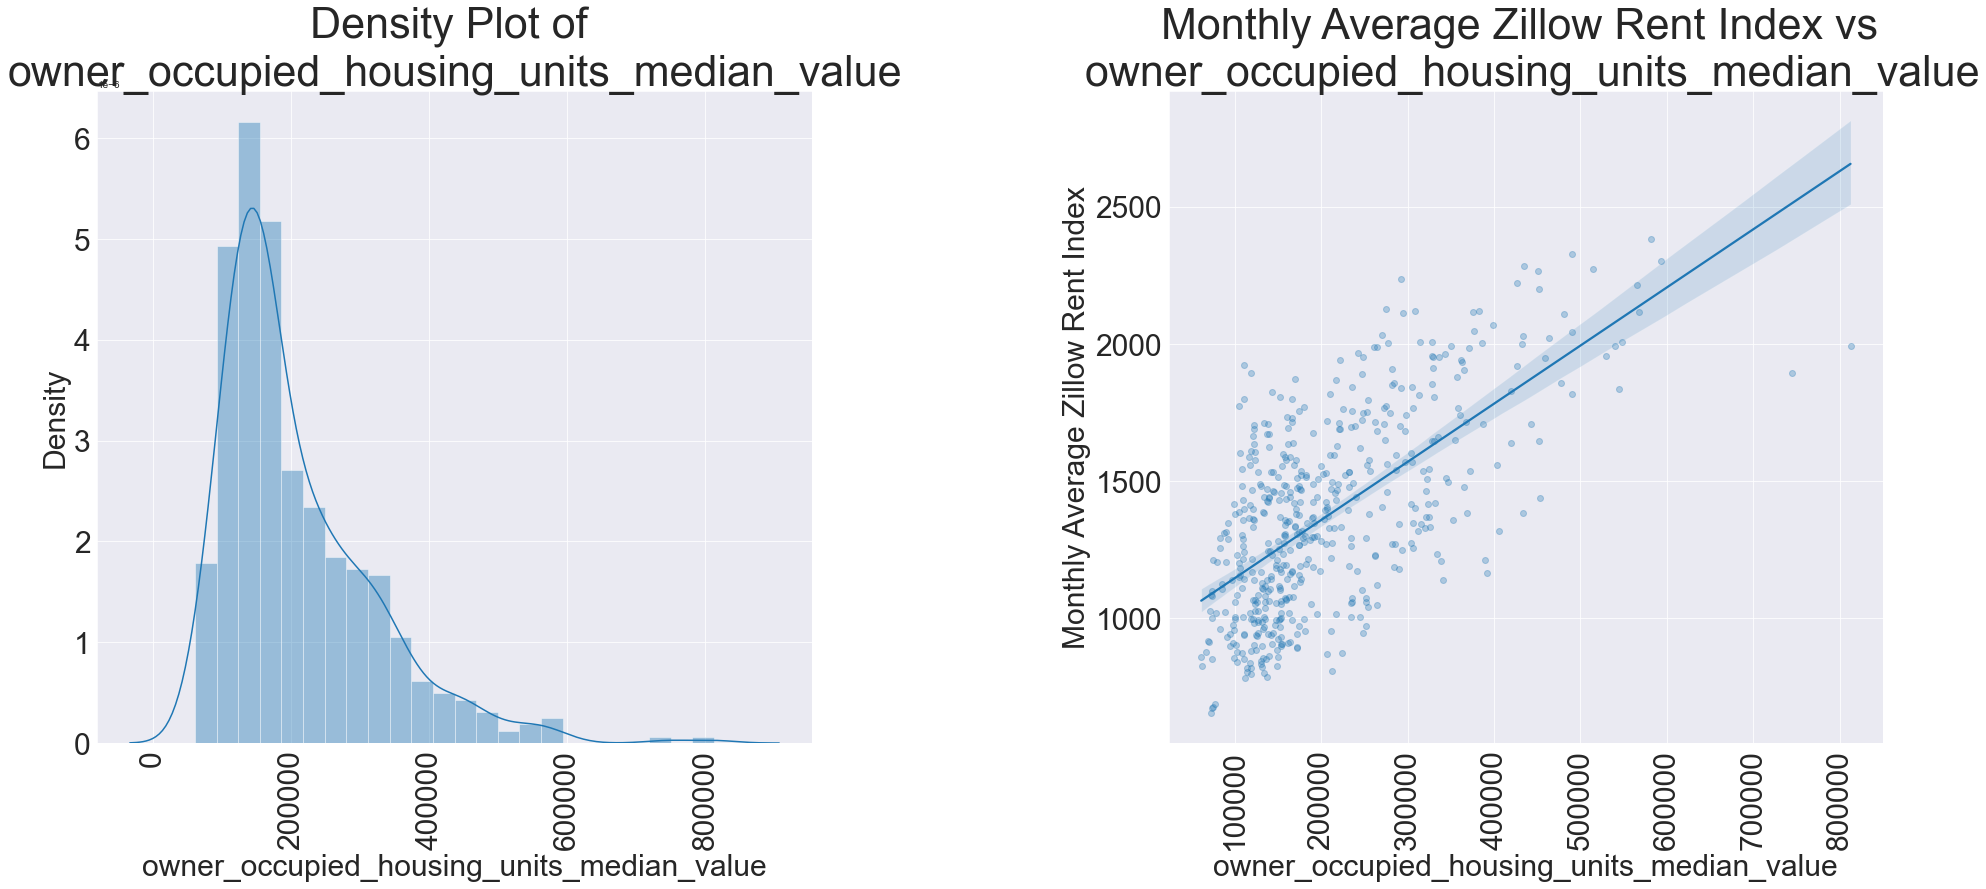

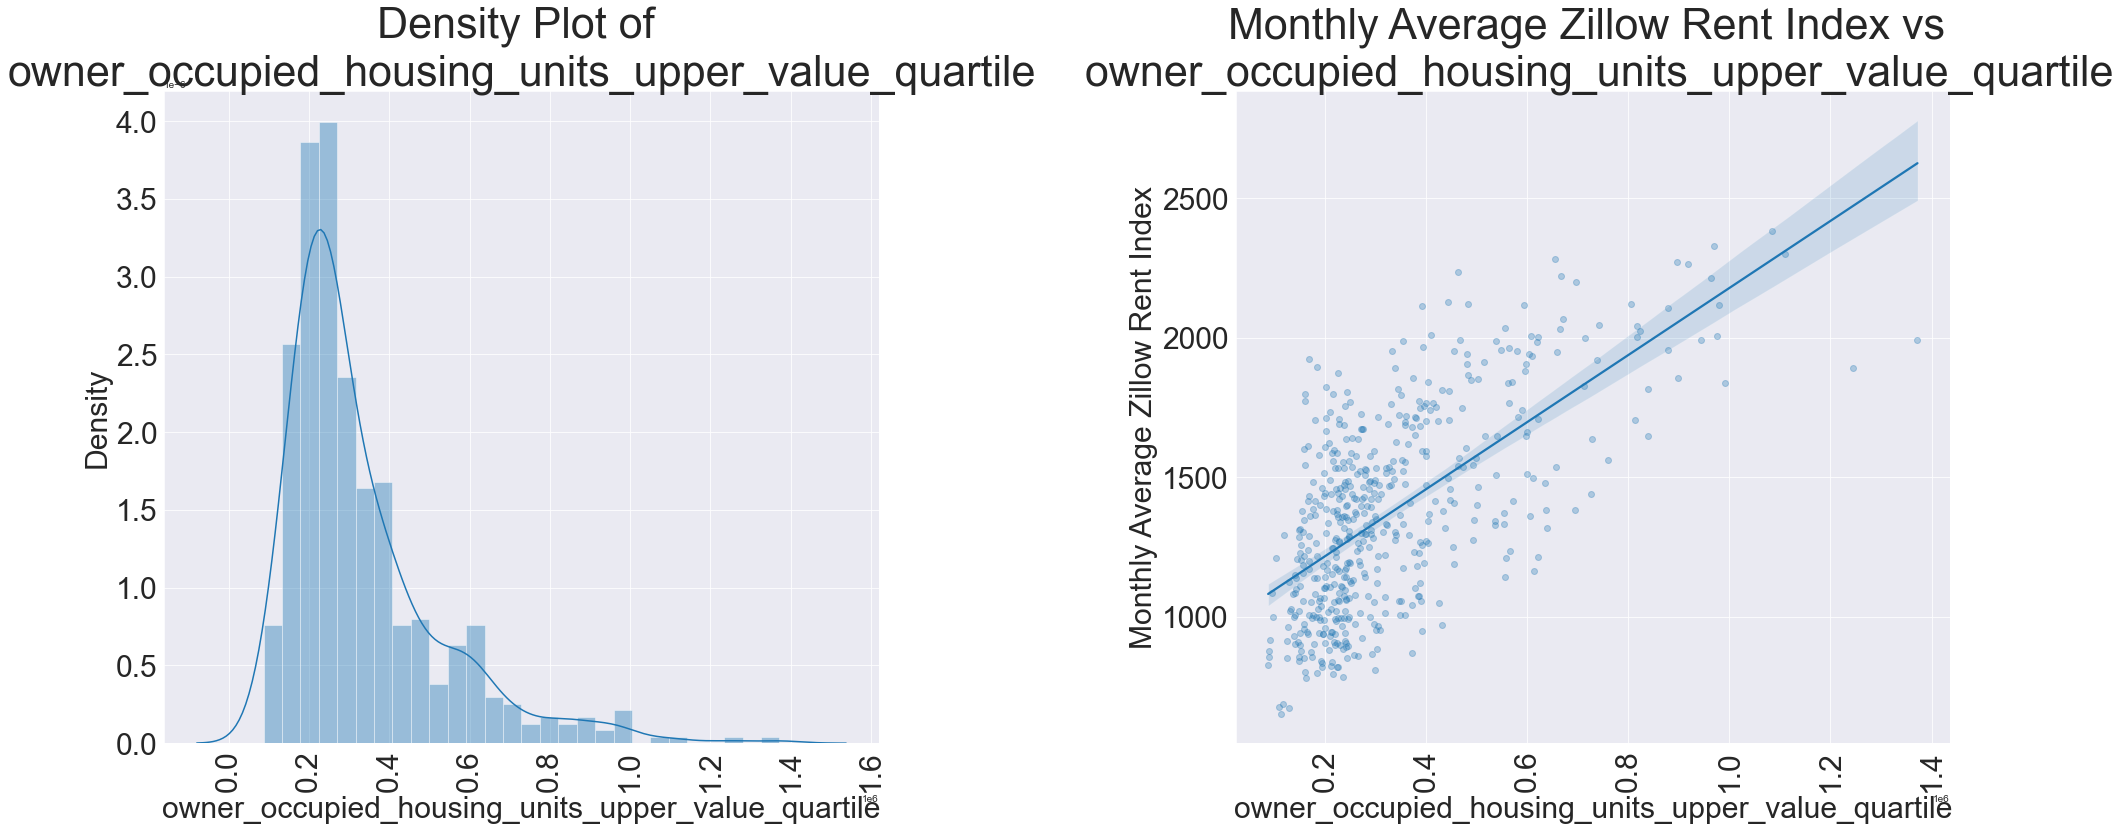

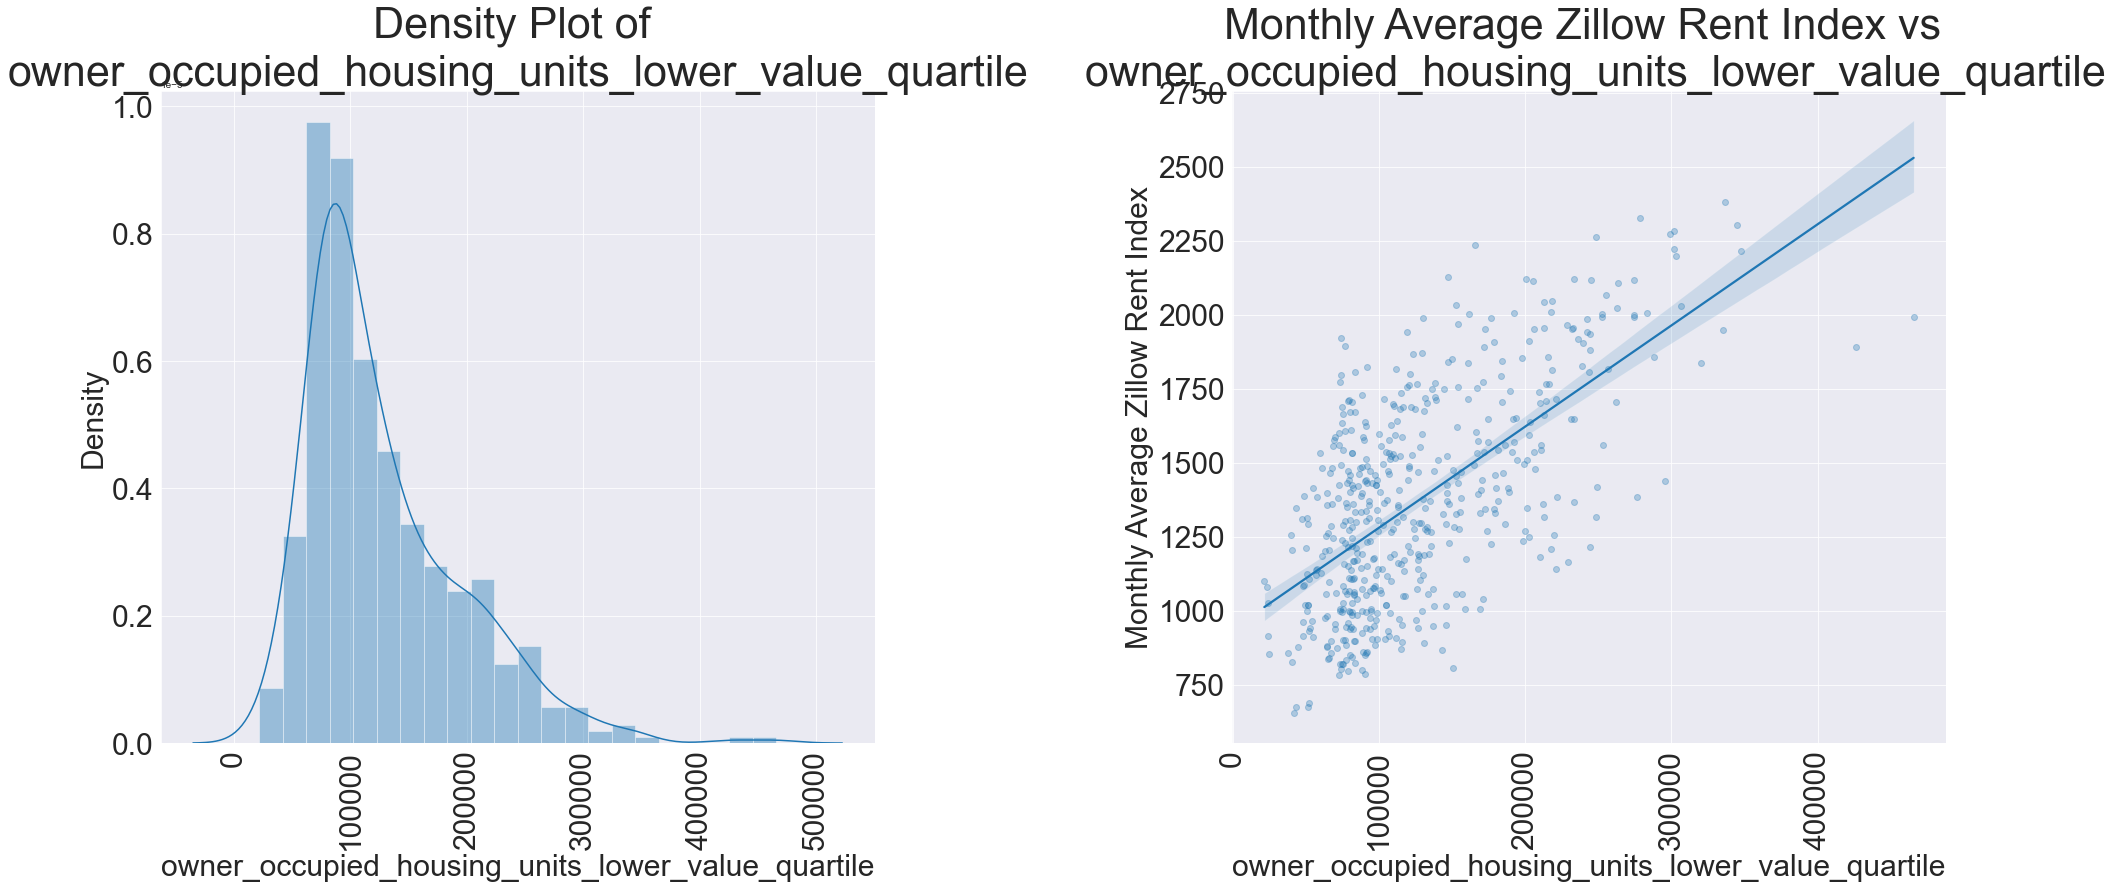

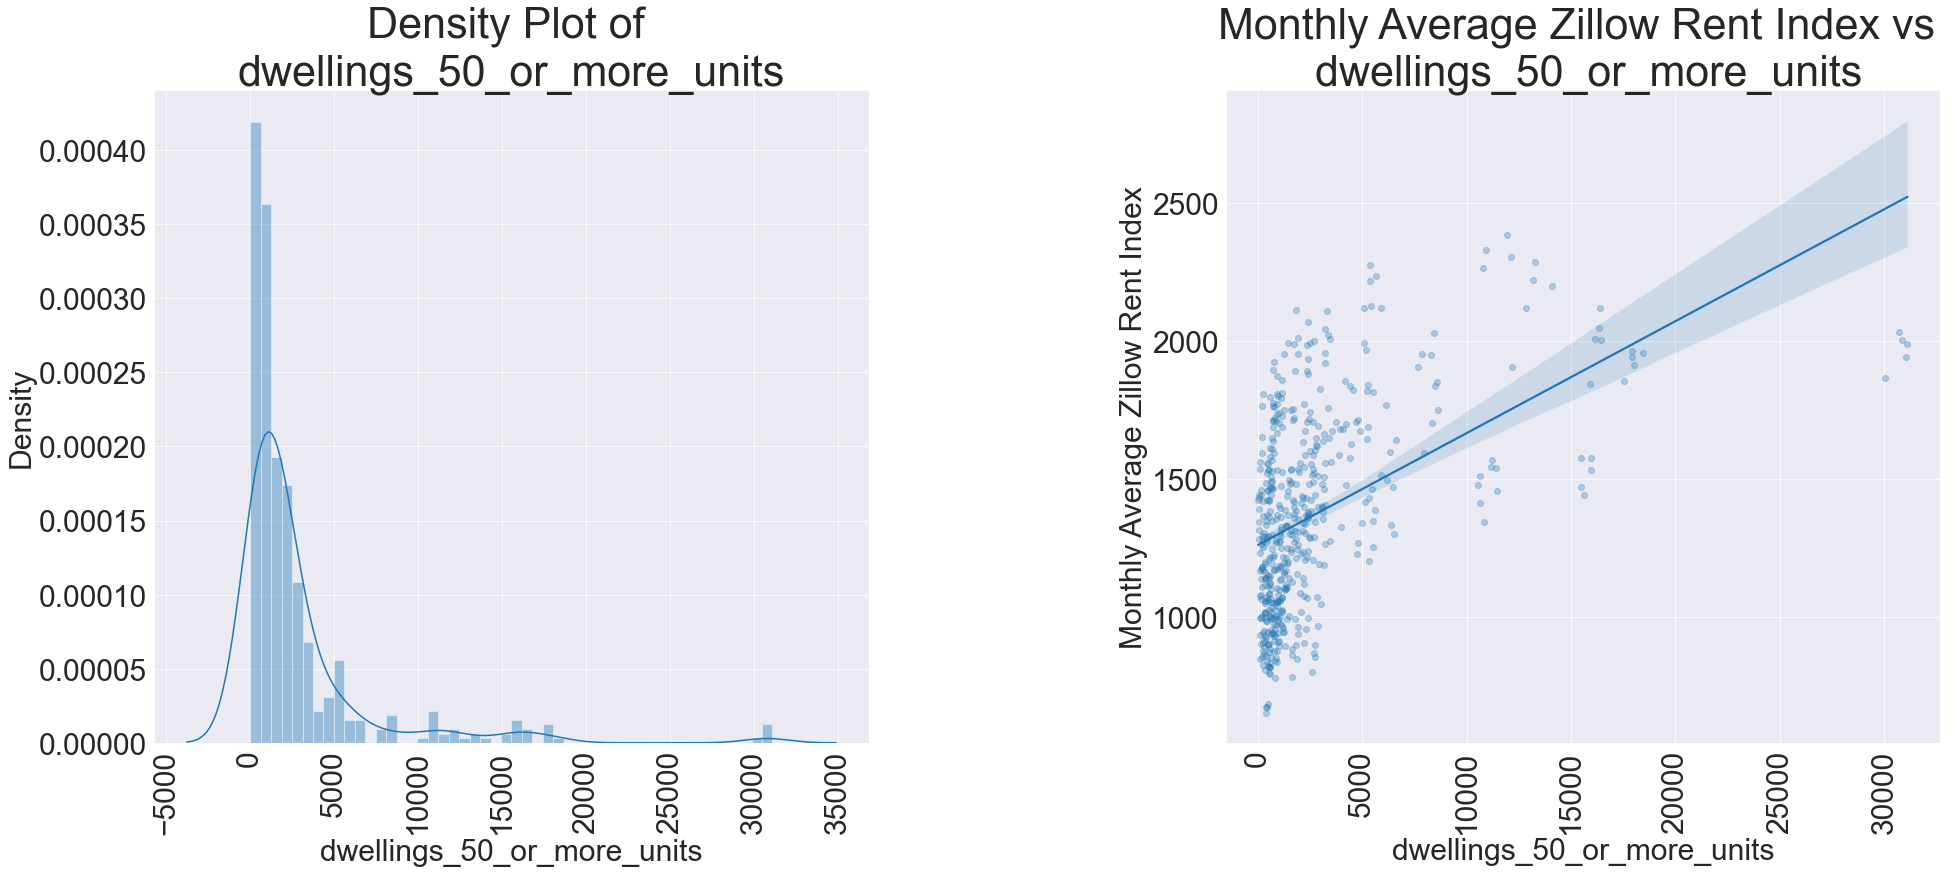

In [50]:
#Plotting the top 4 features which correlate higher with the target
for feature in top_corr_features.index[:5]: 
    if feature=="Monthly_Avg_Zip":
        continue
    feature_plot(df, feature)

In [59]:
df.isna().sum().sort_values(ascending=False)

Monthly_Avg_Zip                                                   0
one_car                                                           0
commute_25_29_mins                                                0
commute_30_34_mins                                                0
commute_35_44_mins                                                0
commute_60_more_mins                                              0
commute_45_59_mins                                                0
commuters_16_over                                                 0
walked_to_work                                                    0
worked_at_home                                                    0
no_car                                                            0
no_cars                                                           0
two_cars                                                          0
median_year_structure_built                                       0
three_cars                                      

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 518 entries, 0 to 517
Columns: 201 entries, Monthly_Avg_Zip to FLSTHPI_Yearly_Avg
dtypes: float64(101), int64(100)
memory usage: 817.5 KB


In [61]:
df.describe()

,Monthly_Avg_Zip,FL_Unemployment,Encoded_Zip,total_pop,households,male_pop,female_pop,median_age,male_under_5,male_5_to_9,male_10_to_14,male_15_to_17,male_18_to_19,male_20,male_21,male_22_to_24,male_25_to_29,male_30_to_34,male_35_to_39,male_40_to_44,male_45_to_49,male_50_to_54,male_55_to_59,male_65_to_66,male_67_to_69,male_70_to_74,male_75_to_79,male_80_to_84,male_85_and_over,female_under_5,female_5_to_9,female_10_to_14,female_15_to_17,female_18_to_19,female_20,female_21,female_22_to_24,female_25_to_29,female_30_to_34,female_35_to_39,female_40_to_44,female_45_to_49,female_50_to_54,female_55_to_59,female_60_to_61,female_62_to_64,female_65_to_66,female_67_to_69,female_70_to_74,female_75_to_79,female_80_to_84,female_85_and_over,population_1_year_and_over,population_3_years_over,pop_16_over,pop_25_years_over,pop_25_64,not_us_citizen_pop,other_race_pop,two_or_more_races_pop,median_income,income_per_capita,income_less_10000,income_10000_14999,income_15000_19999,income_20000_24999,income_25000_29999,income_30000_34999,income_35000_39999,income_40000_44999,income_45000_49999,income_50000_59999,income_60000_74999,income_75000_99999,income_100000_124999,income_125000_149999,income_150000_199999,income_200000_or_more,pop_determined_poverty_status,poverty,gini_index,housing_units,owner_occupied_housing_units_lower_value_quartile,owner_occupied_housing_units_median_value,owner_occupied_housing_units_upper_value_quartile,housing_units_renter_occupied,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,dwellings_1_units_detached,dwellings_1_units_attached,dwellings_2_units,dwellings_3_to_4_units,dwellings_5_to_9_units,dwellings_10_to_19_units,dwellings_20_to_49_units,dwellings_50_or_more_units,mobile_homes,housing_built_2005_or_later,housing_built_2000_to_2004,housing_built_1939_or_earlier,median_year_structure_built,married_households,nonfamily_households,family_households,households_public_asst_or_food_stamps,male_male_households,female_female_households,children,children_in_single_female_hh,owner_occupied_housing_units,million_dollar_housing_units,mortgaged_housing_units,different_house_year_ago_different_city,different_house_year_ago_same_city,families_with_young_children,two_parent_families_with_young_children,two_parents_in_labor_force_families_with_young_children,two_parents_father_in_labor_force_families_with_young_children,two_parents_mother_in_labor_force_families_with_young_children,two_parents_not_in_labor_force_families_with_young_children,one_parent_families_with_young_children,father_one_parent_families_with_young_children,father_in_labor_force_one_parent_families_with_young_children,commute_less_10_mins,commute_10_14_mins,commute_15_19_mins,commute_20_24_mins,commute_25_29_mins,commute_30_34_mins,commute_35_44_mins,commute_60_more_mins,commute_45_59_mins,commuters_16_over,walked_to_work,worked_at_home,no_car,no_cars,one_car,two_cars,three_cars,four_more_cars,aggregate_travel_time_to_work,commuters_by_public_transportation,commuters_by_bus,commuters_by_car_truck_van,commuters_by_carpool,commuters_by_subway_or_elevated,commuters_drove_alone,group_quarters,associates_degree,bachelors_degree,high_school_diploma,less_one_year_college,masters_degree,one_year_more_college,less_than_high_school_graduate,high_school_including_ged,bachelors_degree_2,bachelors_degree_or_higher_25_64,graduate_professional_degree,some_college_and_associates_degree,male_45_64_associates_degree,male_45_64_bachelors_degree,male_45_64_graduate_degree,male_45_64_less_than_9_grade,male_45_64_grade_9_12,male_45_64_high_school,male_45_64_some_college,male_45_to_64,employed_pop,unemployed_pop,pop_in_labor_force,not_in_labor_force,workers_16_and_over,armed_forces,civilian_labor_force,employed_agriculture_forestry_fishing_hunting_mining,employed_arts_entertainment_recreation_accommodation_food,employed_construction,employed_education_health_social,employed_finance_insurance_real_estate,employed_information,employed_manufacturing,employed

In [62]:
df.dtypes

Monthly_Avg_Zip                                                   float64
FL_Unemployment                                                   float64
Encoded_Zip                                                         int64
total_pop                                                           int64
households                                                          int64
male_pop                                                            int64
female_pop                                                          int64
median_age                                                        float64
male_under_5                                                        int64
male_5_to_9                                                         int64
male_10_to_14                                                       int64
male_15_to_17                                                       int64
male_18_to_19                                                       int64
male_20                               